# EDA and data prep

In [11]:
## import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Output options

In [10]:
## Exclude life expectancy from output csv?
exclude_life_exp = True

## Choose response variables to use
resp_vars = ['HDM', 'PCT_DIABETES_ADULTS13']

## Load Datasets
Uncomment to load specific datasets. Not all are needed and the ones that are needed are read in later.

In [3]:
# ## FoodEnvironmentAtlas
# variable_list = pd.read_csv('data/FoodEnvironmentAtlas/VariableList.csv')
# supp_data_state = pd.read_csv('data/FoodEnvironmentAtlas/SupplementalDataState.csv')
# supp_data_county = pd.read_csv('data/FoodEnvironmentAtlas/SupplementalDataCounty.csv')
# state_county_data = pd.read_csv('data/FoodEnvironmentAtlas/StateAndCountyData.csv')
# 
# ## HeartDiseaseMortality
# heart_disease_mortality = pd.read_csv('data/HeartDiseaseMortality/Heart_Disease_Mortality.csv')
# 
# ## LifeExpectancy
# life_expectancy = pd.read_csv('data/LifeExpectancy/U.S._Life_Expectancy.csv')

## Initial Feature Selection
Note: more recent data was available for some features, but I chose to use data between the years of 2010-2015
### Response/Dependent Variables
1. "PCT_DIABETES_ADULTS13" (FoodEnvironmentalAtlas): % of adults with diabetes per county 2013
2. "Life Expectancy" (U.S._Life_Expectancy): estimated life expectancy by census tract 2010-2015 (possibly uses median household for interpolation)
3. "Data_Value" (Heart_Disease_Mortality): heart disease mortality per 100,000 people per county 2014
### Independent Variables/Features
From FoodEnvironmentAtlas. All to the county level unless otherwise specified.
#### Socioeconomic
1. “PCT_65OLDER10” - % 65 and older in 2010 
2. “PCT_18YOUNGER10” - % 18 and younger in 2010 
3. “MEDHHINC15” - median household income 2015 
4. “POVRATE15” - poverty rate 2015 
5. “METRO13” - metro/non-metro counties 2010 
6. "PCT_NHWHITE10" - % population identifying as white 2010
7. "PCT_NHBLACK10" - % population identifying as black 2010
8. "PCT_HISP10" - % population identifying as Hispanic 2010
#### Store access and food assistance 
1. “PCT_LACCESS_POP15” - % population with low access to store 2015 
2. “PCT_LACCESS_LOWI15” - % low income and low access to store 2015 
3. “PCT_LACCESS_HHNV15” - % households w no car and low access to store 2015 
4. “PCT_LACCESS_SNAP15” - % SNAP households w low access to store 2015 
5. “PCT_LACCESS_CHILD15” - % children w low access to store 2015 
6. “PCT_LACCESS_SENIORS15” - % seniors w low access to store 2015 
7. “GROC11” - grocery stores 2011 
8. “SUPERC11” - supercenters and club stores 2011 
9. “CONVS11” - convenience stores 2011 
10. “SPECS11” - specialized food stores 2011 
11. “SNAPSPTH12” - SNAP authorized stores per 1000 people 2012 
12. “PC_SNAPBEN12” - SNAP benefits per capita 2012 
#### Restaurant availability 
1. “FFR11” - fast food restaurants 2011 
2. “FSR11” - full service restaurants 2011 
#### Food tax (by state) 
1. “SODATAX_STORES14” - soda sales tax retail stores 2014 
2. “SODATAX_VENDM14” - soda sales tax vending machines 2014 
3. “CHIPSTAX_STORES14” - chips and pretzels sales tax retail stores 2014 
4. “CHIPSTAX_VENDM14” - chips and pretzels sales tax vending machines 2014 
5. “FOOD_TAX14” - general food sales tax 2014 
#### Local foods 
1. “DIRSALES_FARMS12” - farms with direct sales 2012 
2. “DIRSALES12” - direct farm sales 2012 ($1000s) 
3. “PC_DIRSALES12” - direct farm sales per capita 2012 ($1s) 
4. “FMRKT13” - farmers markets 2013 
5. “FMRKT_SNAP13” - farmers markets that report accepting SNAP 2013 
6. “PCT_FMRKT_FRVEG13” - % farmers markets that report selling fruits and vegetables 2013 
7. “PCT_FMRKT_ANMLPROD13” - % farmers markets that report selling animal products 2013 
8. “VEG_FARMS12” - vegetable farms 2012 
9. “VEG_ACRES12” - vegetable acres harvested 2012 
10. “ORCHARD_FARMS12” - orchard farms 2012 
11. “ORCHARD_ACRES12” - orchard acres 2012 
12. “BERRY_FARMS12” - berry farms 2012 
13. “BERRY_ACRES12” - berry acres 2012 
14. “SLHOUSE12” - small slaughterhouse facilities 2012 
15. “GHVEG_FARMS12” - greenhouse veg and herb farms 2012 
16. “CSA12” - CSA farms 2012 
17. “AGRITRSM_OPS12” - agritourism operations 2012 
18. “AGRITRSM_RCT12” - agritourism receipts 2012 ($1s) 
#### Recreation and fitness 
1. “RECFAC11” - recreation and fitness facilities 2011 
#### Supplemental data 
1. 2010 census population 

In [6]:
## List of features to keep from state_county_data
state_county_features = ["PCT_DIABETES_ADULTS13", "PCT_65OLDER10", "PCT_18YOUNGER10", "MEDHHINC15", "POVRATE15", "METRO13", "PCT_LACCESS_POP15", "PCT_LACCESS_LOWI15", "PCT_LACCESS_HHNV15", "PCT_LACCESS_SNAP15", "PCT_LACCESS_CHILD15", "PCT_LACCESS_SENIORS15", "GROC11", "SUPERC11", "CONVS11", "SPECS11", "SNAPSPTH12", "PC_SNAPBEN12", "FFR11", "FSR11", "SODATAX_STORES14", "SODATAX_VENDM14", "CHIPSTAX_STORES14", "CHIPSTAX_VENDM14", "FOOD_TAX14", "DIRSALES_FARMS12", "DIRSALES12", "PC_DIRSALES12", "FMRKT13", "FMRKT_SNAP13", "PCT_FMRKT_FRVEG13", "PCT_FMRKT_ANMLPROD13", "VEG_FARMS12", "VEG_ACRES12", "ORCHARD_FARMS12", "ORCHARD_ACRES12", "BERRY_FARMS12", "BERRY_ACRES12", "SLHOUSE12", "GHVEG_FARMS12", "CSA12", "AGRITRSM_OPS12", "AGRITRSM_RCT12", "RECFAC11", "PCT_NHWHITE10", "PCT_NHBLACK10", "PCT_HISP10"]

## Select features from state_county_data and tidy dataframe
state_county_data = pd.read_csv('data/FoodEnvironmentAtlas/StateAndCountyData.csv')
state_county_data['CountySt'] = state_county_data['County'].str.cat(state_county_data['State'], sep=', ')
df = state_county_data[state_county_data["Variable_Code"].isin(state_county_features)].pivot_table(index="CountySt", columns="Variable_Code", values="Value", aggfunc='max')
del state_county_data

## Merge supplementary data (2010 Census Population)
supp_data_county = pd.read_csv('data/FoodEnvironmentAtlas/SupplementalDataCounty.csv')
supp_data_county['County'] = [c if 'County' not in c else c[:-7] for c in supp_data_county['County']]
supp_data_county['CountySt'] = supp_data_county['County'].str.cat(supp_data_county['State'], sep=',')
supp_data_county = supp_data_county.pivot(index="CountySt", columns="Variable_Code", values="Value")
df = df.join(supp_data_county, how="left")
df.drop(supp_data_county.columns[1:], axis=1, inplace=True)
del supp_data_county

## Merge heart disease mortality
hdm = pd.read_csv('data/HeartDiseaseMortality/Heart_Disease_Mortality.csv')
hdm = hdm.loc[(hdm["Stratification1"]=="Overall") & (hdm["Stratification2"]=="Overall"), ["LocationAbbr", "LocationDesc", "Data_Value"]]
hdm.rename(columns={'LocationAbbr': 'State', 'LocationDesc': 'County', 'Data_Value': 'HDM'}, inplace=True)
hdm['County'] = [c if 'County' not in c else c[:-7] for c in hdm['County']]
hdm['CountySt'] = hdm['County'].str.cat(hdm['State'], sep=', ')
hdm.drop(['State', 'County'], axis=1, inplace=True)
hdm.set_index('CountySt', inplace=True)
df = df.join(hdm, how='left')
del hdm

## Merge life expectancy
life_expectancy = pd.read_csv('data/LifeExpectancy/U.S._Life_Expectancy.csv')
life_expectancy.dropna(axis=0, how='any', inplace=True)
life_expectancy['County'] = life_expectancy['County'].str.replace(' County', '')
life_expectancy.rename(columns={'County': 'CountySt'}, inplace=True)
life_expectancy = life_expectancy[['CountySt','Life Expectancy']].groupby(['CountySt']).mean()
df = df.join(life_expectancy, how='left')
del life_expectancy

## Remove duplicated indices
df = df.groupby(level=0).max()

## Compare Response Variables
### Pairplot
All 3 variables appear somewhat normally distributed, or could approximate normal with log transformation.
### Heatmap
Diabetes rate and heart disease mortality are positively correlated as expected. Both variables are negatively correlated with life expectancy as expected.

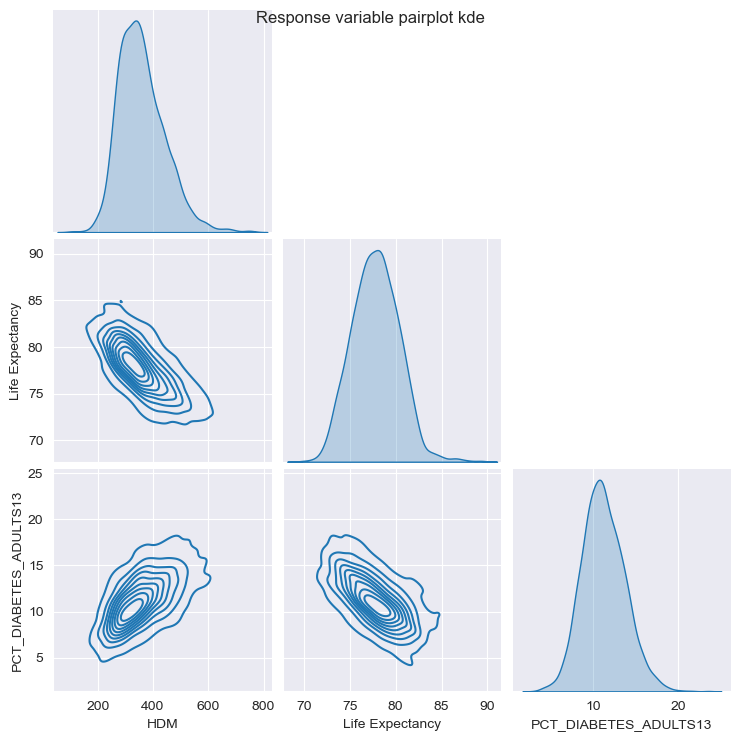

In [8]:
sns.pairplot(df, vars=['HDM', 'Life Expectancy', 'PCT_DIABETES_ADULTS13'], corner=True, diag_kind='kde', kind='kde')
plt.suptitle('Response variable pairplot kde')
plt.savefig('data/figures/Response variable pairplot.png')
plt.show()

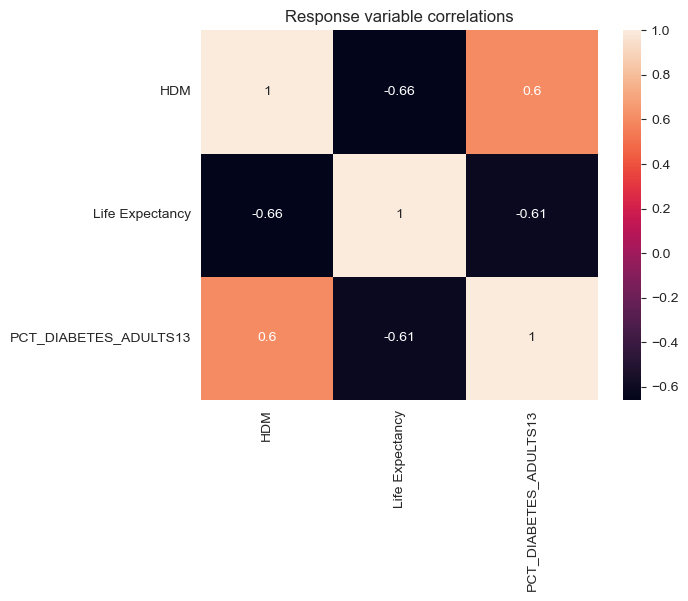

In [9]:
sns.heatmap(df[['HDM', 'Life Expectancy', 'PCT_DIABETES_ADULTS13']].corr(), annot=True)
plt.title('Response variable correlations')
plt.savefig('data/figures/Response variable corr heatmap.png')
plt.show()

## Response Variable PCA
Perform dimensionality reduction on the possible response variables to obtain a single response variable capturing the trends in all.
### Pairplot
The contour plots between PC1 and the response variables are noticeably less variable than the contour plots between the response variables themselves (above).
### Heatmap
Likewise, the correlation coefficients are greater as well.
### Note
PC1 is positively correlated with heart disease mortality and diabetes rate, meaning that <b>greater</b> values of PC1 indicate <b>worse</b> health

Selected Response Variables: ['HDM', 'PCT_DIABETES_ADULTS13']
Explained variance ratios: [0.79920531 0.20079469]
% data retained after removing response variable nans: 96.59%



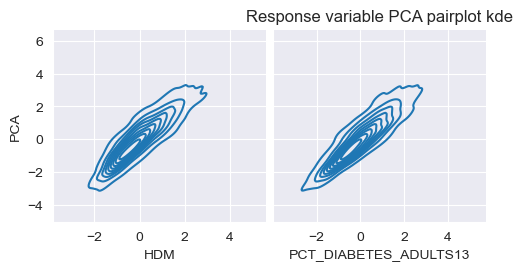

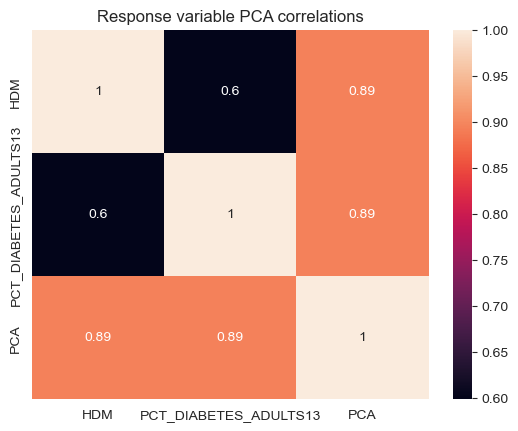

In [15]:
# Print selected response variables
print(f'Selected Response Variables: {resp_vars}')

# Select response variables and standardize
pca_df = df[resp_vars].copy()
pca_df.dropna(axis=0, how='any', inplace=True)
pca_df[resp_vars] = StandardScaler().fit_transform(pca_df)

# PCA fit, transform, calculate explained variance
explained_var = PCA(random_state=10).fit(pca_df).explained_variance_ratio_
pca_df['PCA'] = PCA(random_state=10, n_components=1).fit_transform(pca_df)
print(f'Explained variance ratios: {explained_var}')

# count nans in response variables
df[resp_vars].isna().sum()
print(f'% data retained after removing response variable nans: {pca_df.shape[0] / df.shape[0]*100:.2f}%\n')

# merge PCA response variable
df = df.join(pca_df['PCA'], how='left')

# compare first principle component with raw response variables
sns.pairplot(pca_df, x_vars=resp_vars, y_vars=['PCA'], kind='kde')
plt.title('Response variable PCA pairplot kde')
plt.savefig('data/figures/Response variable PCA pairplot.png')
plt.show()

# display correlations between response variables
sns.heatmap(pca_df.corr(), annot=True)
plt.title('Response variable PCA correlations')
plt.savefig('data/figures/Response variable PCA corr heatmap.png')
plt.show()